<a href="https://colab.research.google.com/github/Yasmic/MnistClassification/blob/master/MnistClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mnist calssifiacation

In [0]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

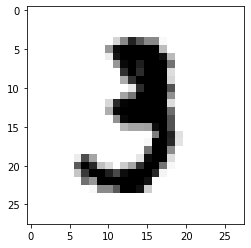

In [18]:
plt.imshow(X_train[10],cmap='gray_r')

In [19]:
y_train[10]

3

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

In [0]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [24]:
X_train.shape

(60000, 28, 28, 1)

In [25]:
X_test.shape

(10000, 28, 28, 1)

In [33]:
# show preferred channel order
from keras import backend
print(backend.image_data_format())

channels_last


In [0]:
X_train = X_train / 255
X_test = X_test / 255

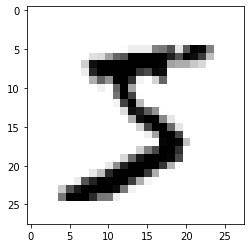

In [60]:
plt.imshow(X_train[0,:,:,0],cmap="gray_r")

In [57]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [65]:
y_test.shape

(10000, 10)

In [0]:
num_classes = y_test.shape[1]

In [0]:
num_classes = y_test.shape[0]

In [0]:

def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=( 28, 28,1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
model = baseline_model()

In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

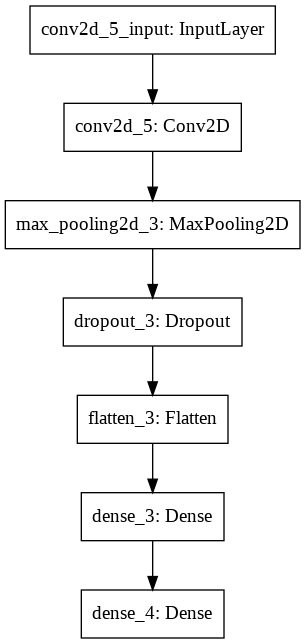

In [50]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [70]:

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.2416 - accuracy: 0.9298 - val_loss: 0.0801 - val_accuracy: 0.9759
Epoch 2/10
 - 2s - loss: 0.0740 - accuracy: 0.9776 - val_loss: 0.0518 - val_accuracy: 0.9833
Epoch 3/10
 - 2s - loss: 0.0523 - accuracy: 0.9839 - val_loss: 0.0437 - val_accuracy: 0.9862
Epoch 4/10
 - 2s - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0385 - val_accuracy: 0.9876
Epoch 5/10
 - 2s - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0359 - val_accuracy: 0.9886
Epoch 6/10
 - 2s - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0347 - val_accuracy: 0.9874
Epoch 7/10
 - 2s - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0336 - val_accuracy: 0.9887
Epoch 8/10
 - 2s - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0370 - val_accuracy: 0.9879
Epoch 9/10
 - 2s - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0340 - val_accuracy: 0.9887
Epoch 10/10
 - 2s - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0367 - val_accuracy: 0.9885


In [0]:
test = np.expand_dims(X_test[1],0)

In [0]:
predicted = model.predict(test)

In [84]:
predicted.shape


(1, 10)

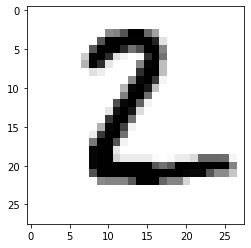

In [92]:
plt.imshow(test[0,:,:,0],cmap="gray_r")

In [93]:
np.argmax(predicted[0])

2